In [28]:
#example from http://efavdb.com/mean-shift/
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from itertools import cycle
from PIL import Image

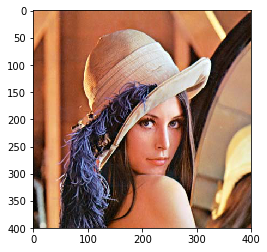

In [29]:

image = Image.open('lenna.jpg')
width, height = image.size
new_width = round(width/1)
new_height = round(height/1)
image = image.resize((new_width, new_height), Image.ANTIALIAS)
plt.imshow(image)

In [30]:
image = np.array(image)
image.shape

(400, 400, 3)

In [31]:
#Need to convert image into feature array based
#on rgb intensities
flat_image=np.reshape(image, [-1, 3])

In [57]:
#Estimate bandwidth
bandwidth2 = estimate_bandwidth(flat_image, quantile=.2, n_samples=10)
bandwidth2

26.146586806696558

In [58]:
ms = MeanShift(bandwidth2, bin_seeding=True)
ms.fit(flat_image)
labels=ms.labels_
n_clusters_ = len(np.unique(labels))
print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 8


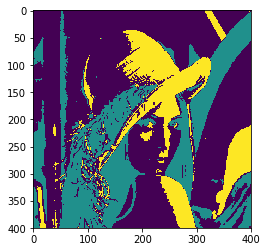

In [56]:
# Plot image vs segmented image
plt.imshow(np.reshape(labels, [new_height, new_width]))